## **MODELO 2**

Modelo para la clasificación de Alpha o Betha.

### **LIBRERIAS**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import warnings
warnings.simplefilter('ignore')

### **DATA**

In [2]:
path_base = os.path.abspath(os.path.join(os.getcwd(),'..'))
path_data = os.path.join(path_base,'data','input','dataset_alpha_betha.csv')
path_output = os.path.join(path_base,'data','output')

data = pd.read_csv(path_data)
data.head(10)

,autoID,SeniorCity,Partner,Dependents,Service1,Service2,Security,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,Charges,Demand,Class
0,7590-VHVEG,0,Yes,No,No,No phone service,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Alpha
1,5575-GNVDE,0,No,No,Yes,No,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.5,Alpha
2,3668-QPYBK,0,No,No,Yes,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Betha
3,7795-CFOCW,0,No,No,No,No phone service,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,Alpha
4,9237-HQITU,0,No,No,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Betha
5,9305-CDSKC,0,No,No,Yes,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,99.65,820.5,Betha
6,1452-KIOVK,0,No,Yes,Yes,Yes,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,Alpha
7,6713-OKOMC,0,No,No,No,No phone service,Yes,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,Alpha
8,7892-POOKP,0,Yes,No,Yes,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Betha
9,6388-TABGU,0,No,Yes,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,Alpha


## **EDA**

In [3]:
print(f'Los Datos tienen {len(data.columns)} columnas')
print(f'Los Datos tienen {len(data)} filas')

Los Datos tienen 16 columnas
Los Datos tienen 7043 filas


In [4]:
print(f'Los Datos tienen {data.duplicated().sum()} valores duplicados')

Los Datos tienen 0 valores duplicados


In [5]:
# Tipos de datos
data.dtypes

autoID               object
SeniorCity            int64
Partner              object
Dependents           object
Service1             object
Service2             object
Security             object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges             float64
Demand               object
Class                object
dtype: object

In [6]:
# Separar los datos numericos y categoricos
df_num = data.select_dtypes(include=['float64','int64'])
df_obj = data.select_dtypes(include='object')


In [7]:
# Identificar valores unicos en los datos categoricos

for col in df_obj.columns:
    print(f'{col} : {df_obj[col].unique()}')

autoID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
Service1 : ['No' 'Yes']
Service2 : ['No phone service' 'No' 'Yes']
Security : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Demand : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Class : ['Alpha' 'Betha']


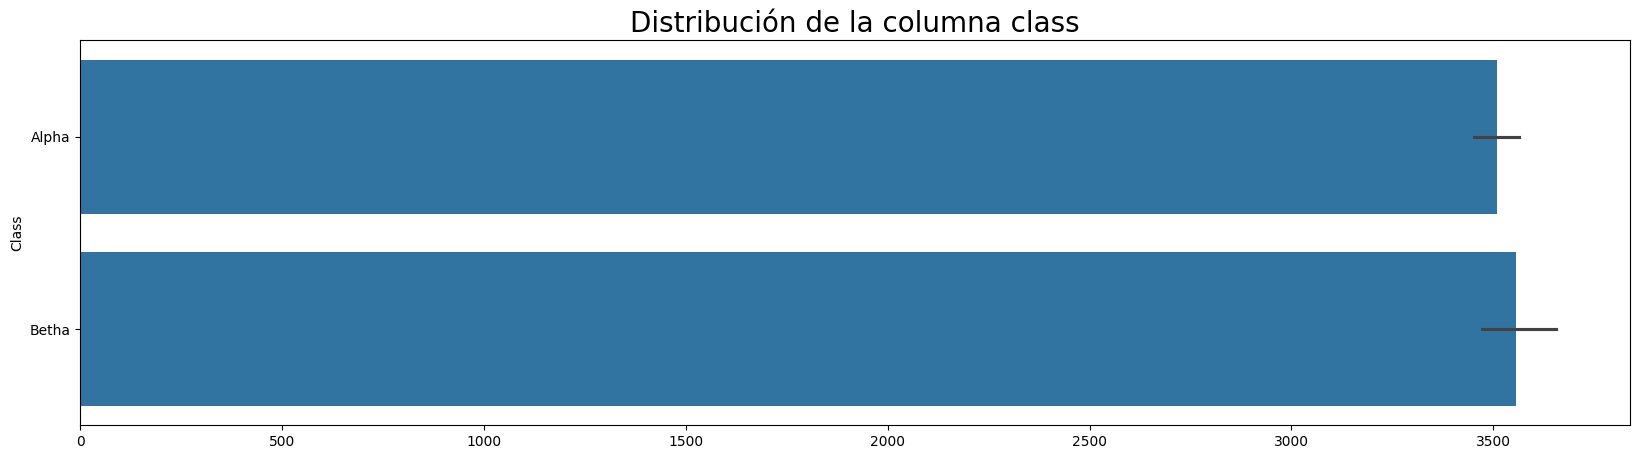

In [8]:
plt.figure(figsize=(20,5))
sns.barplot(data=df_obj['Class'])
plt.title('Distribución de la columna class',fontsize=20)
plt.show()

In [9]:
# Valores Nulos
df_obj.isnull().sum()

autoID              0
Partner             0
Dependents          0
Service1            0
Service2            0
Security            0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Demand              0
Class               0
dtype: int64

## **PREPROCESAMIENTO**

In [10]:
from sklearn.preprocessing import OrdinalEncoder
df_obj = df_obj.drop(columns=['autoID','Demand','Class'])

In [11]:
one_encoder = OrdinalEncoder()
df_one_hot = one_encoder.fit_transform(df_obj)
df_one_hot = pd.DataFrame(df_one_hot, columns=df_obj.columns)

In [12]:
data['Demand'] = data['Demand'].replace(' ', np.nan)
df_num['Demand'] = pd.to_numeric(data['Demand'], errors='coerce')
df_num['Demand'] = df_num['Demand'].replace(np.nan, 0)

In [13]:
data_model = pd.concat([df_num,df_one_hot,data['Class']], axis=1)
data_model.head()

,SeniorCity,Charges,Demand,Partner,Dependents,Service1,Service2,Security,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,Class
0,0,29.85,29.85,1.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,Alpha
1,0,56.95,1889.50,0.0,0.0,1.0,0.0,2.0,0.0,2.0,0.0,1.0,0.0,3.0,Alpha
2,0,53.85,108.15,0.0,0.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,3.0,Betha
3,0,42.30,1840.75,0.0,0.0,0.0,1.0,2.0,0.0,2.0,2.0,1.0,0.0,0.0,Alpha
4,0,70.70,151.65,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,Betha


In [14]:
class_encoder = OrdinalEncoder()

In [15]:
data_model['Class'] = class_encoder.fit_transform(data_model[['Class']])

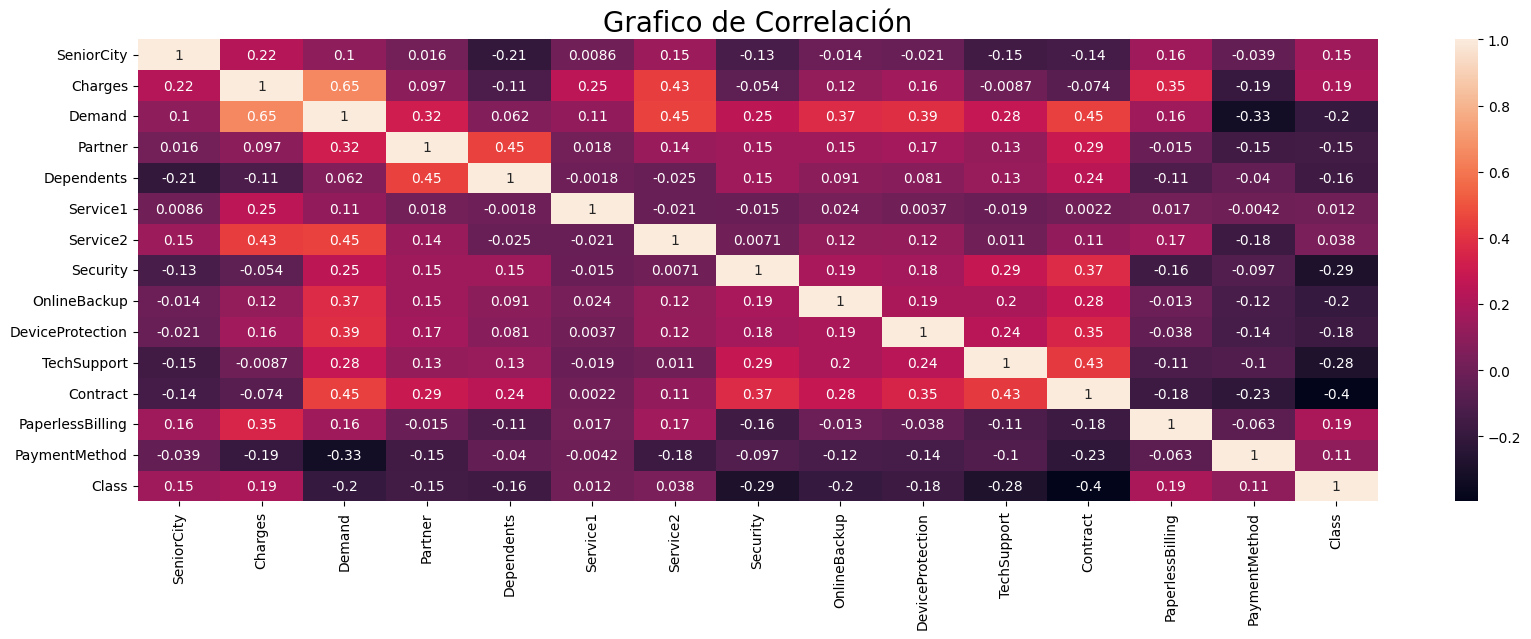

In [16]:
plt.figure(figsize=(20,6))
sns.heatmap(data=data_model.corr(), annot=True)
plt.title('Grafico de Correlación', fontsize= 20)
plt.show()

## **MODELO CLASIFICACION**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size= 0.25, random_state=42,stratify=y)

In [21]:
rf = RandomForestClassifier(n_estimators=300, max_depth=10,criterion='entropy',random_state=42)


In [22]:
rf.fit(Xtrain,ytrain)
pred_value = rf.predict(Xtest)
    

In [23]:
acc_score = accuracy_score(ytest,pred_value)
print(round(acc_score,2))

0.79


In [24]:
pd.DataFrame(confusion_matrix(ytest,pred_value),columns=['Alpha','Betha'])

,Alpha,Betha
0,1164,130
1,239,228


In [25]:
import joblib

joblib.dump(rf,'./model_rf.pkl')
joblib.dump(one_encoder,'./encoder.pkl')

['./encoder.pkl']

In [26]:
import xgboost as xgb

In [27]:
xgb_train = xgb.DMatrix(Xtrain,ytrain,enable_categorical=True)
xgb_test = xgb.DMatrix(Xtest,ytest,enable_categorical=True)

In [28]:
params = {
'objective': 'binary:logistic',
'max_depth': 3,
'learning_rate': 0.1,
}
model = xgb.train(params=params, dtrain=xgb_train ,num_boost_round=50)

In [29]:
preds = model.predict(xgb_test)
preds = preds.astype(int)
accuracy = accuracy_score(ytest, preds)

In [30]:
accuracy

0.7348097671777399